## DIABETES PREDICTION

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
data=pd.read_csv(r"C:\Users\Bavelakpc\Downloads\diabetes.csv")

## Exploratory Data Analysis

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
data.shape

(768, 9)

* we have 768 rows and 9 columns (features)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Checking correlation between features
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

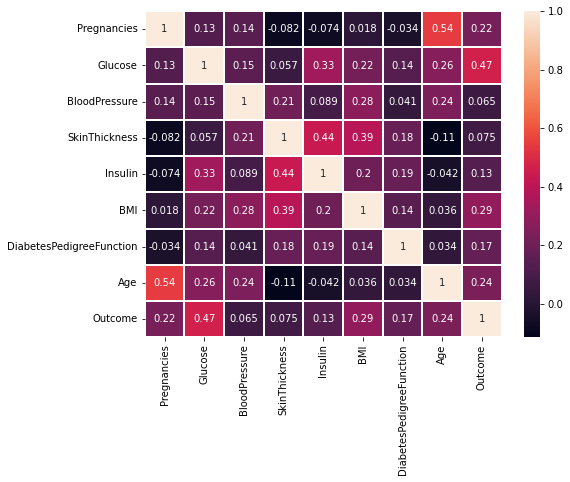

In [7]:
# Checking correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,linewidths=2)
plt.show()

In [8]:
#summary statistics
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

* It seems like null values in the set were represented in the form of zeros 
* It's impossible to have Glucose, BloodPressure, SkinThickness, Insulin, BMI to be zero. 
* Let's learn how many zero values present in each column

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
replacezero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in replacezero:
    data[col].replace(0,np.nan, inplace = True)

In [11]:
data.head(n=10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   
5            5    116.0           74.0            NaN      NaN  25.6   
6            3     78.0           50.0           32.0     88.0  31.0   
7           10    115.0            NaN            NaN      NaN  35.3   
8            2    197.0           70.0           45.0    543.0  30.5   
9            8    125.0           96.0            NaN      NaN   NaN   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

<function matplotlib.pyplot.show(close=None, block=None)>

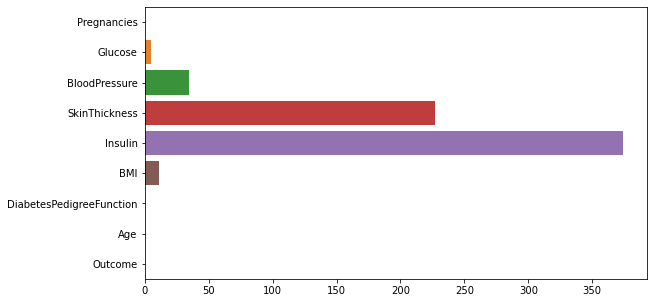

In [12]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x=data.isna().sum(),
              y=data.columns, orient='h')

plt.grid(False)
plt.show

In [13]:
# There is a lot of null values in SkinThickness and Insulin columns

In [14]:
# imputing mean instead of null values
for col in replacezero:
    data[col].replace(np.nan,data[col].mean(),inplace=True)

In [15]:
data.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.686763  30.435949  44.000   99.75000   
BloodPressure             768.0   72.405184  12.096346  24.000   64.00000   
SkinThickness             768.0   29.153420   8.790942   7.000   25.00000   
Insulin                   768.0  155.548223  85.021108  14.000  121.50000   
BMI                       768.0   32.457464   6.875151  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                                 50%         75%     max  
Pregnancies                 3.000000    6.000000   17.00  
Glucose                   117.000000  140.250000  199.00  
BloodPressure              72.202592   80.000000  122.00  
SkinThickness              29.153420   32.000000   99.00  
Insulin                   155.548223  155.548223  846.00  
BMI                        32.400000   36.600000   67.10  
DiabetesPedigreeFunction    0.372500    0.626250    2.42  
Age                        29.000000   41.000000   81.00  
Outcome                     0.000000    1.000000    1.00

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x1440 with 0 Axes>

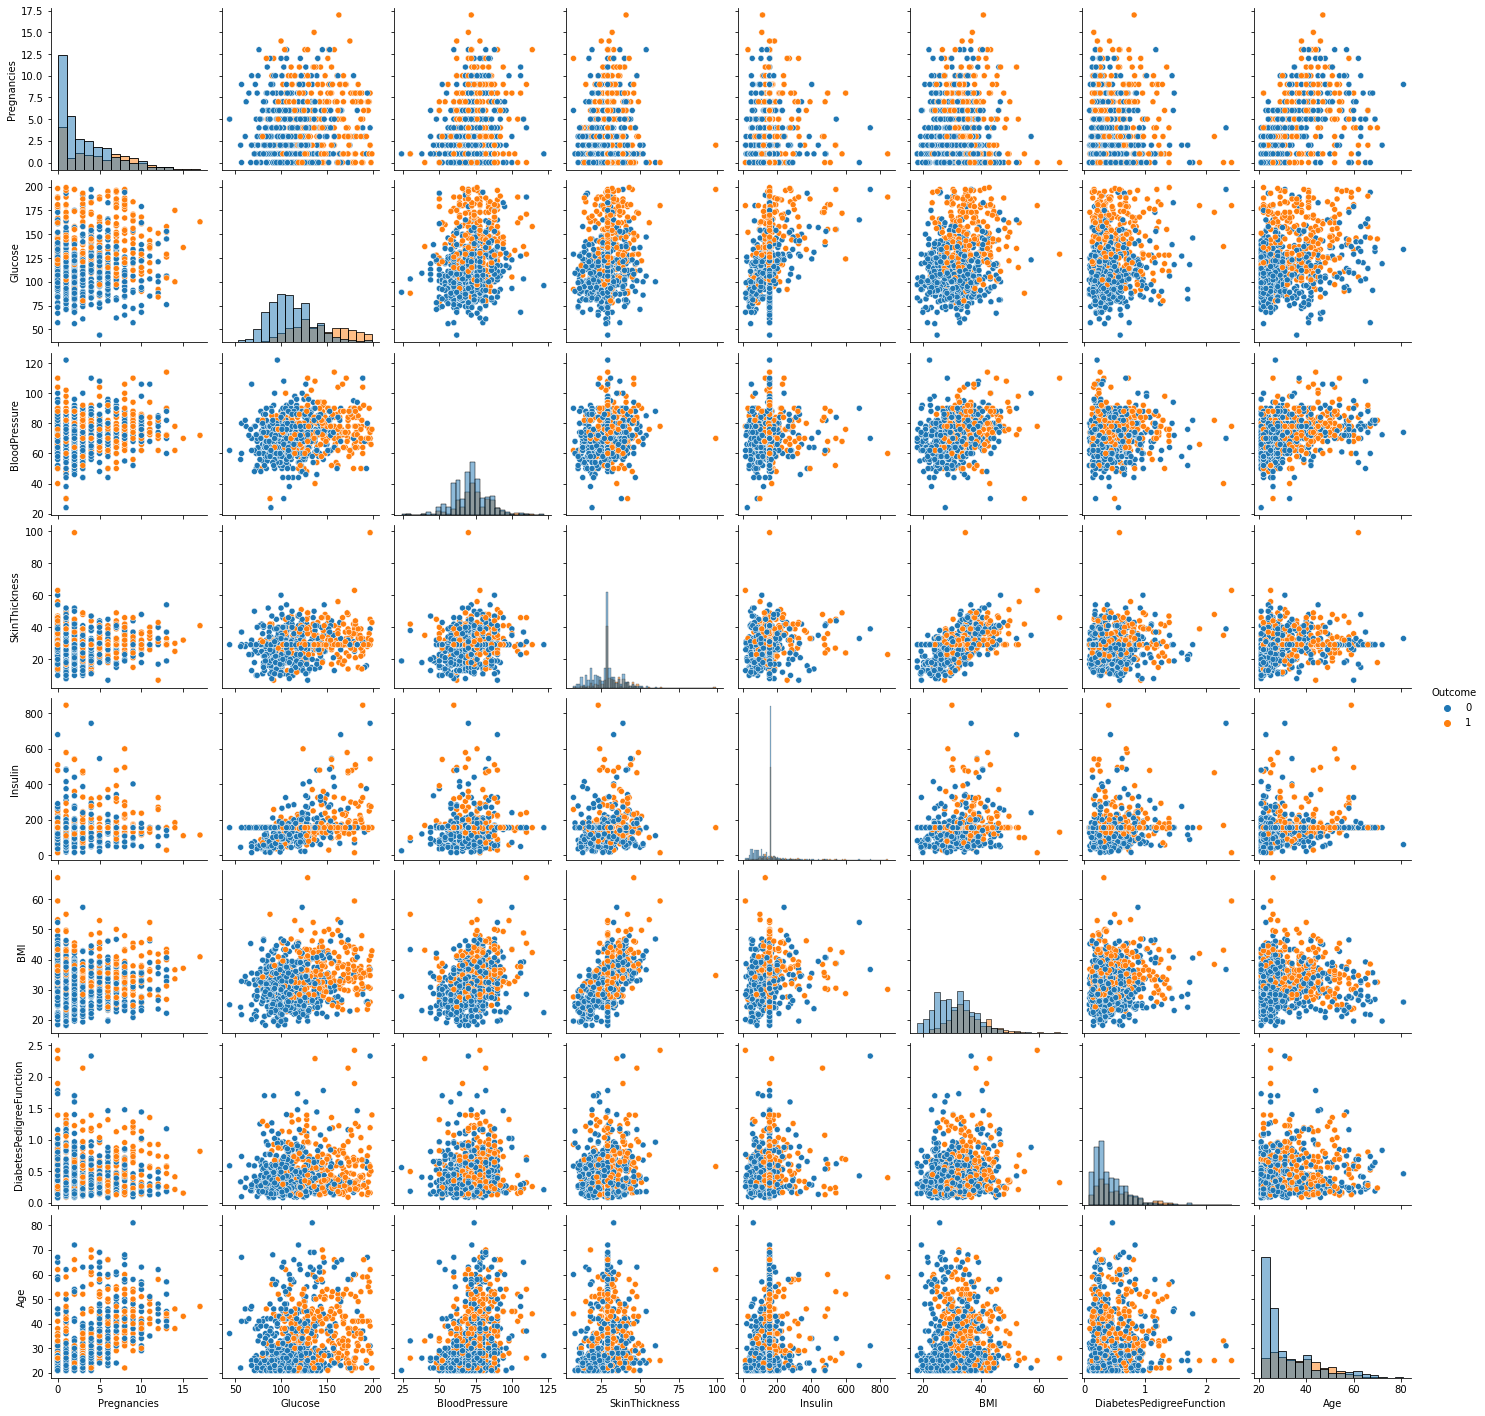

In [16]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data, hue="Outcome",diag_kind="hist")
plt.show

In [17]:
data["Outcome"].value_counts() #distribution of outcomes

0    500
1    268
Name: Outcome, dtype: int64

# checking for dupicate rows

In [18]:
dup=data[data.duplicated()]
print('Number of duplicate rows: ',len(dup))
dup.head(5)

Number of duplicate rows:  0


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

<function matplotlib.pyplot.show(close=None, block=None)>

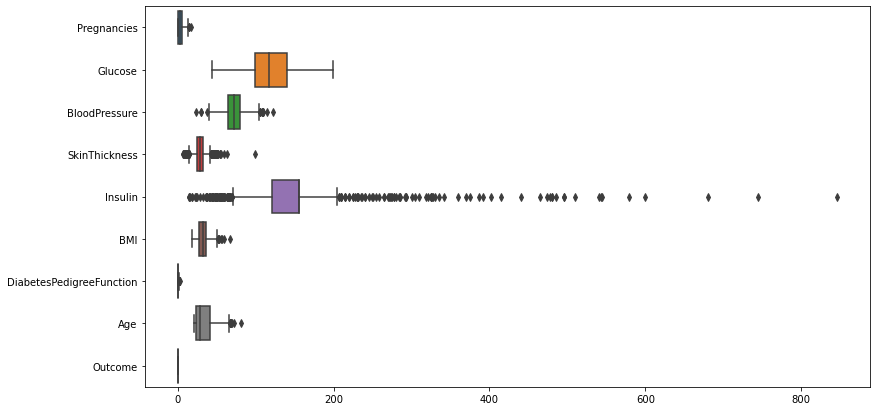

In [19]:
plt.figure(figsize=(13,7))
sns.boxplot(data=data,orient='h')
plt.show

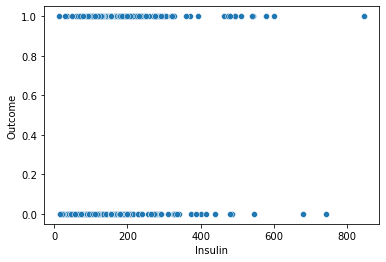

In [20]:
sns.scatterplot(x=data['Insulin'],y=data['Outcome'])
plt.show()

In [21]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Pregnancies                               17
Glucose                                  136
BloodPressure                             47
SkinThickness                             51
Insulin                                  186
BMI                                      248
DiabetesPedigreeFunction                 517
Age                                       52
Outcome                                    2

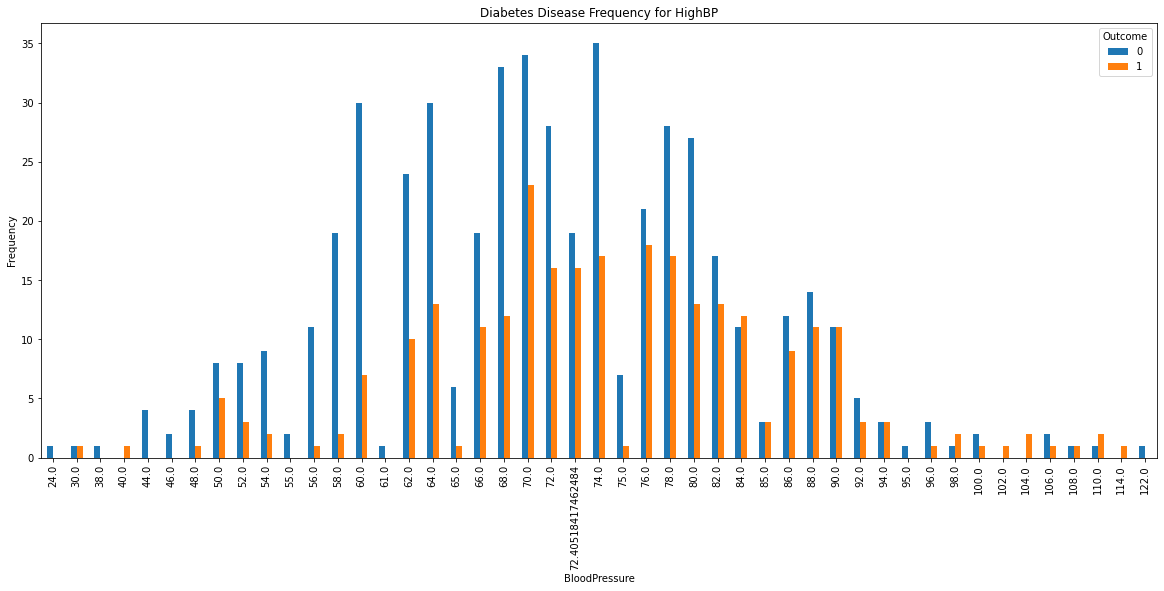

In [22]:
pd.crosstab(data.BloodPressure,data.Outcome).plot(kind="bar",figsize=(20,8))

plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel("BloodPressure")
plt.ylabel('Frequency')
plt.show()

In [23]:
import warnings

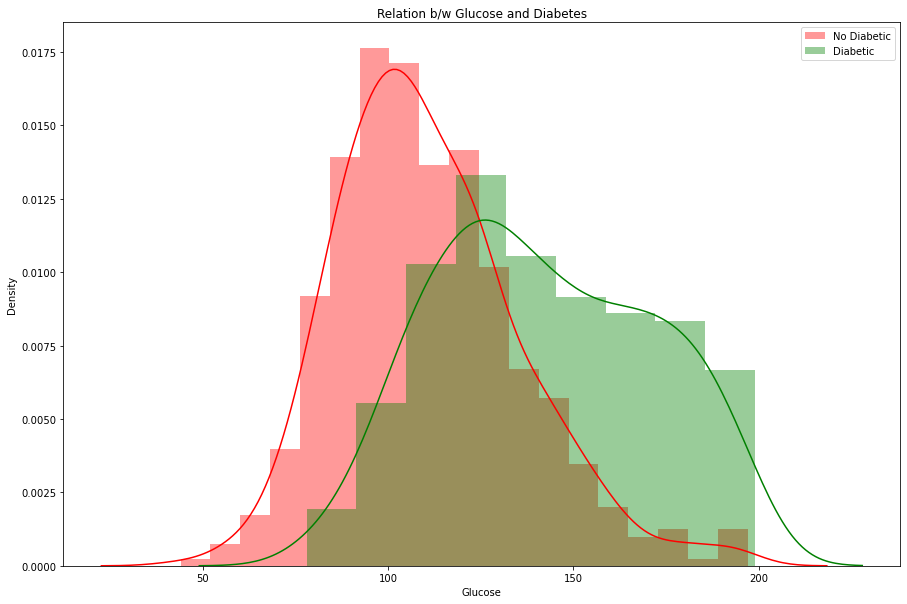

In [24]:
plt.figure(figsize=(15, 10))
warnings.filterwarnings('ignore')

sns.distplot(data.Glucose[data.Outcome == 0], color="r", label="No Diabetic" )
sns.distplot(data.Glucose[data.Outcome == 1], color="g", label="Diabetic" )
plt.title("Relation b/w Glucose and Diabetes")

plt.legend()

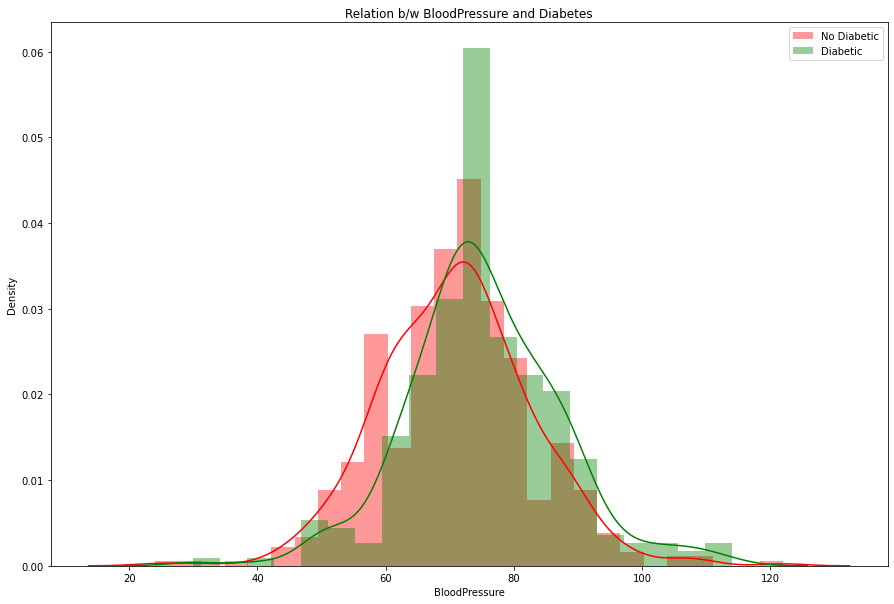

In [25]:
plt.figure(figsize=(15, 10))
warnings.filterwarnings('ignore')

sns.distplot(data.BloodPressure[data.Outcome == 0], color="r", label="No Diabetic" )
sns.distplot(data.BloodPressure[data.Outcome == 1], color="g", label="Diabetic" )
plt.title("Relation b/w BloodPressure and Diabetes")

plt.legend()

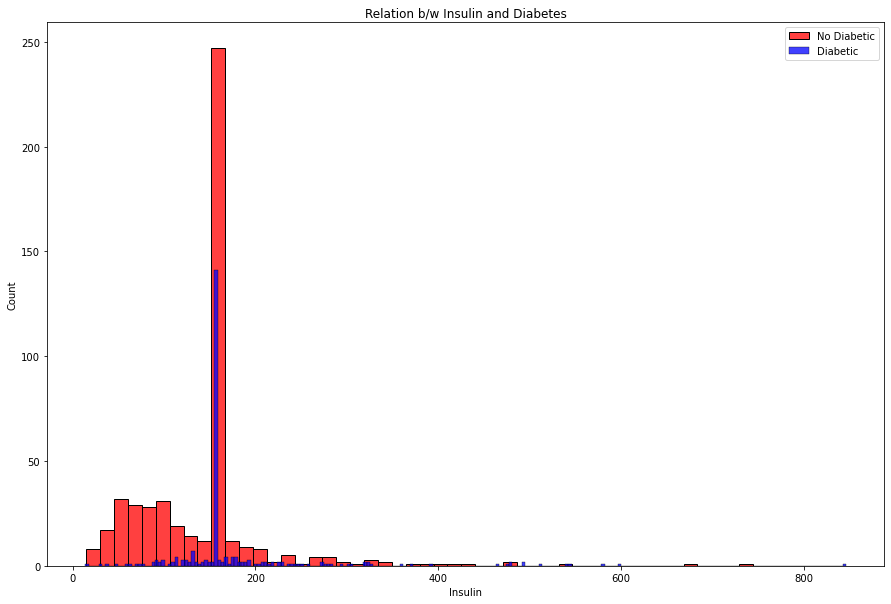

In [26]:
plt.figure(figsize=(15, 10))
warnings.filterwarnings('ignore')

sns.histplot(data.Insulin[data.Outcome == 0], color="r", label="No Diabetic" )
sns.histplot(data.Insulin[data.Outcome == 1], color="b", label="Diabetic" )
plt.title("Relation b/w Insulin and Diabetes")

plt.legend()

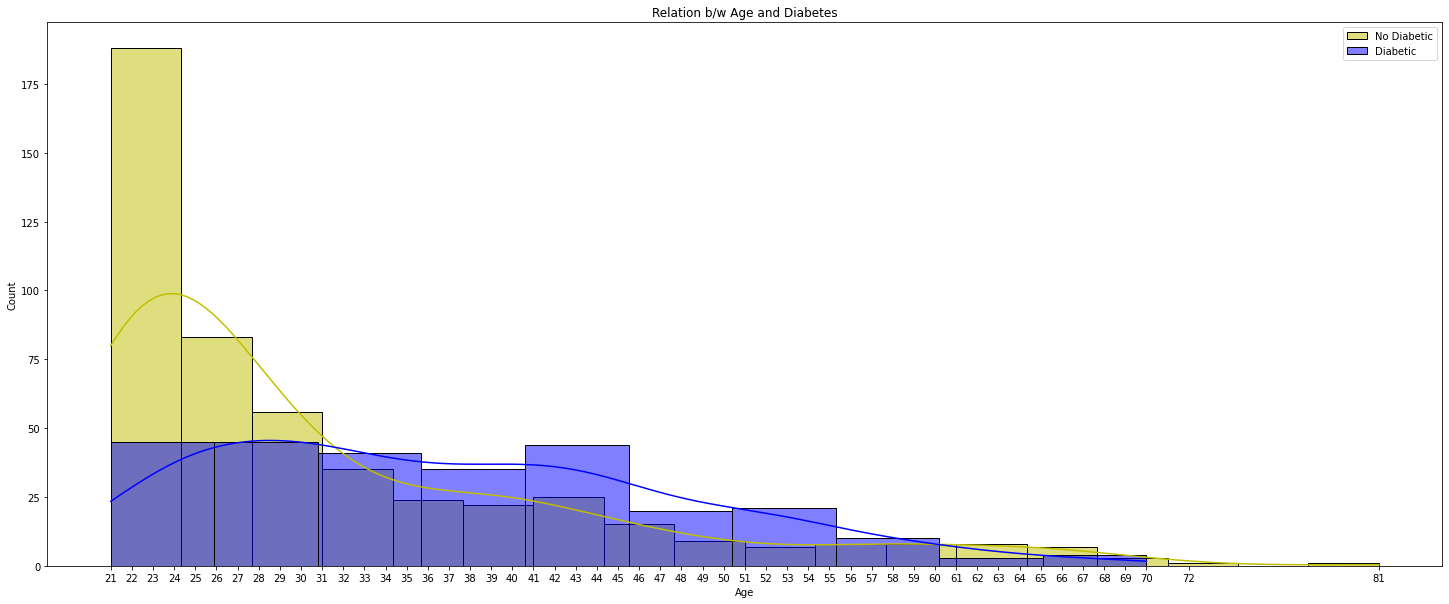

In [27]:
plt.figure(figsize=(25, 10))
sns.histplot(data.Age[data.Outcome == 0], color="y", label="No Diabetic" , kde = True )
sns.histplot(data.Age[data.Outcome == 1], color="b", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(data["Age"].unique())
plt.legend()

In [28]:
#checking BMI values 
import plotly.express as px
px_template = "simple_white"
ax= px.treemap(data,path=['BMI'],title="BMI counts")
ax.show()


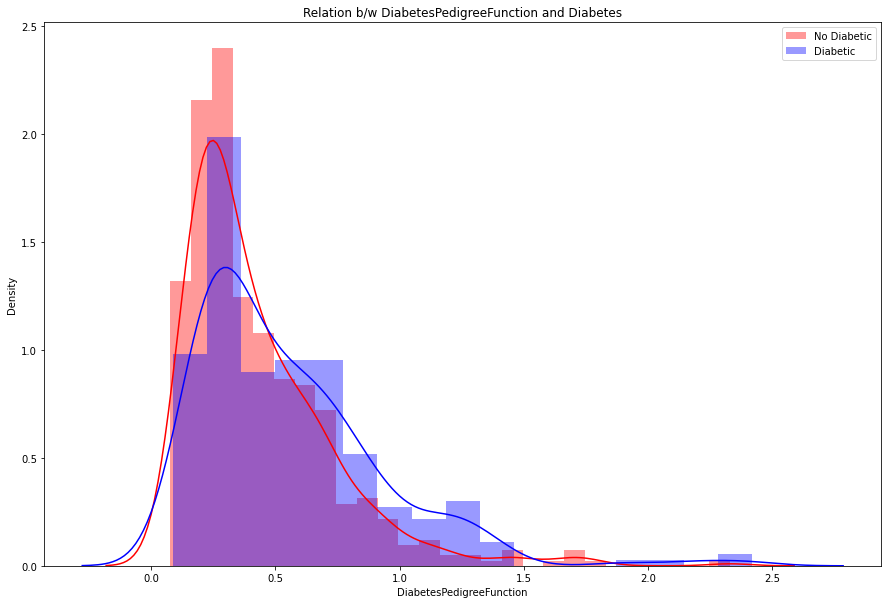

In [29]:
plt.figure(figsize=(15, 10))
warnings.filterwarnings('ignore')

sns.distplot(data.DiabetesPedigreeFunction[data.Outcome == 0], color="r", label="No Diabetic" )
sns.distplot(data.DiabetesPedigreeFunction[data.Outcome == 1], color="b", label="Diabetic" )
plt.title("Relation b/w DiabetesPedigreeFunction and Diabetes")

plt.legend()

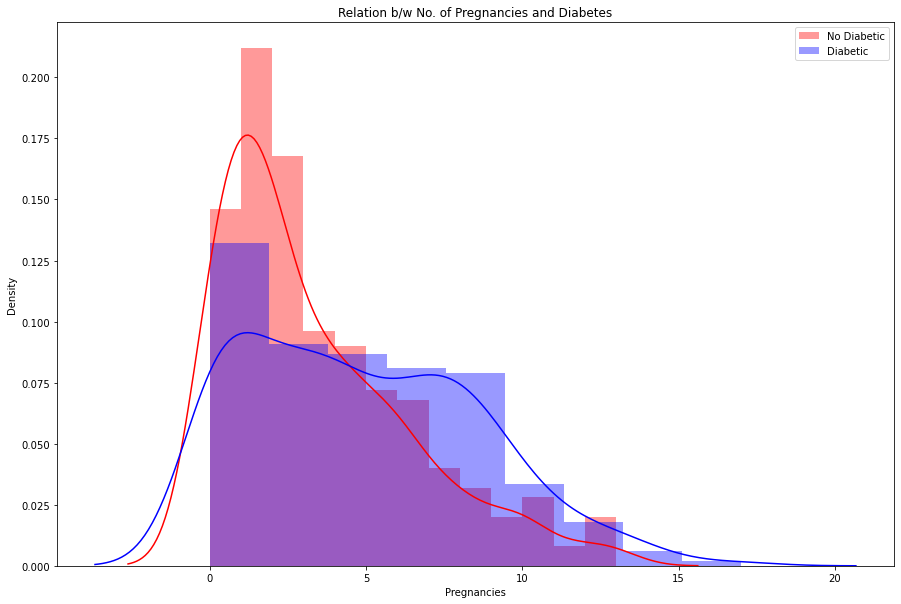

In [30]:
plt.figure(figsize=(15, 10))
warnings.filterwarnings('ignore')

sns.distplot(data.Pregnancies[data.Outcome == 0], color="r", label="No Diabetic" )
sns.distplot(data.Pregnancies[data.Outcome == 1], color="b", label="Diabetic" )
plt.title("Relation b/w No. of Pregnancies and Diabetes")

plt.legend()

# What is the min and max value of each col against each 'Outcome'?

In [31]:
data.groupby('Outcome').min()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Outcome                                                                      
0                  0     44.0           24.0            7.0     15.0  18.2   
1                  0     78.0           30.0            7.0     14.0  22.9   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                           0.078   21  
1                           0.088   21

In [32]:
data.groupby('Outcome').max()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Outcome                                                                      
0                 13    197.0          122.0           60.0    744.0  57.3   
1                 17    199.0          114.0           99.0    846.0  67.1   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                           2.329   81  
1                           2.420   70

In [33]:
data[(data['Glucose']<data['Glucose'].mean())].sample(n=10)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
157            1    109.0           56.0       21.00000  135.000000  25.2   
638            7     97.0           76.0       32.00000   91.000000  40.9   
439            6    107.0           88.0       29.15342  155.548223  36.8   
104            2     85.0           65.0       29.15342  155.548223  39.6   
19             1    115.0           70.0       30.00000   96.000000  34.6   
64             7    114.0           66.0       29.15342  155.548223  32.8   
289            5    108.0           72.0       43.00000   75.000000  36.1   
194            8     85.0           55.0       20.00000  155.548223  24.4   
290            0     78.0           88.0       29.00000   40.000000  36.9   
542           10     90.0           85.0       32.00000  155.548223  34.9   

     DiabetesPedigreeFunction  Age  Outcome  
157                     0.833   23        0  
638                     0.871   32        1  
439                     0.727   31        0  
104                     0.930   27        0  
19                      0.529   32        1  
64                      0.258   42        1  
289                     0.263   33        0  
194                     0.136   42        0  
290                     0.434   21        0  
542                     0.825   56        1

In [34]:
data.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.710121      70.935397      27.768651  142.210761   
1           4.865672  142.165573      75.147324      31.736944  180.431548   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.888434                  0.429734  31.190000  
1        35.384757                  0.550500  37.067164

In [35]:
ndata=data.iloc[:,[0,1,4,5,6,7,8]]

In [36]:
ndata

Pregnancies  Glucose     Insulin   BMI  DiabetesPedigreeFunction  Age  \
0              6    148.0  155.548223  33.6                     0.627   50   
1              1     85.0  155.548223  26.6                     0.351   31   
2              8    183.0  155.548223  23.3                     0.672   32   
3              1     89.0   94.000000  28.1                     0.167   21   
4              0    137.0  168.000000  43.1                     2.288   33   
..           ...      ...         ...   ...                       ...  ...   
763           10    101.0  180.000000  32.9                     0.171   63   
764            2    122.0  155.548223  36.8                     0.340   27   
765            5    121.0  112.000000  26.2                     0.245   30   
766            1    126.0  155.548223  30.1                     0.349   47   
767            1     93.0  155.548223  30.4                     0.315   23   

     Outcome  
0          1  
1          0  
2          1  
3          0  
4          1  
..       ...  
763        0  
764        0  
765        0  
766        1  
767        0  

[768 rows x 7 columns]

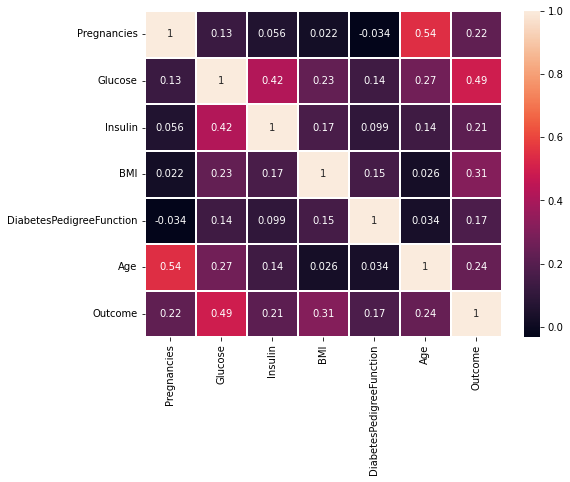

In [37]:
# Checking correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(ndata.corr(),annot=True,linewidths=2)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x1440 with 0 Axes>

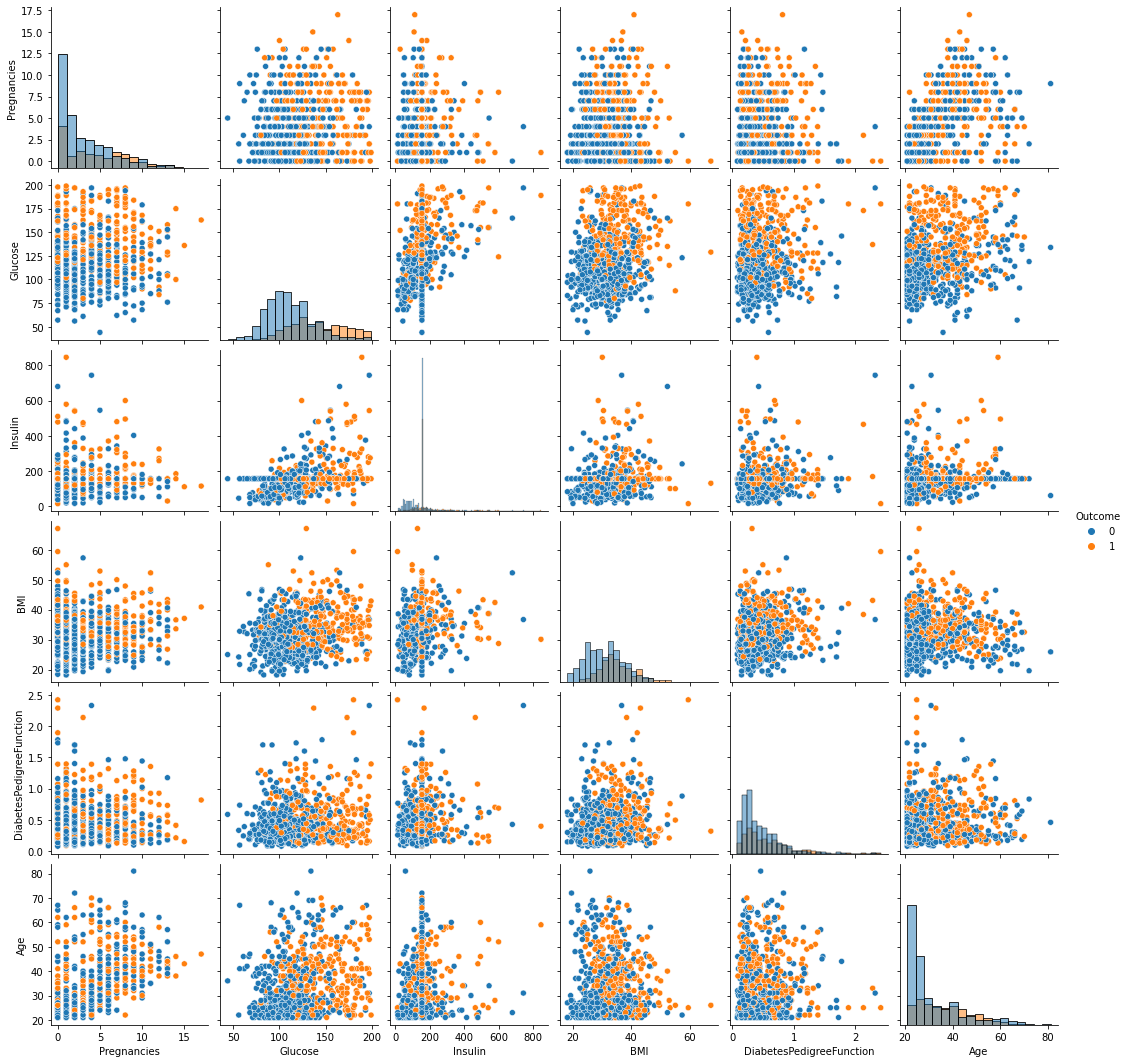

In [38]:
plt.figure(figsize=(20,20))
sns.pairplot(data=ndata, hue="Outcome",diag_kind="hist")
plt.show

# STORE FEATURE MATRIX AND RESPONSE (TARGET) IN VECTOR y

In [39]:
X=ndata.drop('Outcome',axis=1)
y=ndata['Outcome']

# SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Scikit- learn Pipeline

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [42]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),('lr_classifier',LogisticRegression())])

pipelline_knn=Pipeline([('scalar2',StandardScaler()),('knn_classifier',KNeighborsClassifier())])

pipeline_svc=Pipeline([('scalar3',StandardScaler()),('svc_classifier',SVC())])

pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_gbc=Pipeline([('gbc_classifier',GradientBoostingClassifier())])

In [43]:
pipelines=[pipeline_lr,pipelline_knn,pipeline_svc,pipeline_dt,pipeline_rf,pipeline_gbc]

In [44]:
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('scalar3', StandardScaler()), ('svc_classifier', SVC())]),
 Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier())]),
 Pipeline(steps=[('gbc_classifier', GradientBoostingClassifier())])]

In [45]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [46]:
pipe_dict={0:'LR',
          1:'KNN',
          2:'SVC',
          3:'DT',
          4:'RF',
          5:'GBC'}

In [47]:
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [48]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_train,y_train)*100))

LR Test Accuracy:77.19869706840392
KNN Test Accuracy:81.27035830618892
SVC Test Accuracy:82.73615635179154
DT Test Accuracy:100.0
RF Test Accuracy:100.0
GBC Test Accuracy:92.34527687296416


In [49]:
X=ndata.drop('Outcome',axis=1)
y=ndata['Outcome']

In [50]:
rf=RandomForestClassifier(n_estimators=500,random_state=1,oob_score=True)

In [51]:
rf.fit(X,y)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=1)

# PREDICTION ON NEW DATA

In [52]:
new_data=pd.DataFrame({
    'Pregnancies':4,
    'Glucose':155.0,
    'Insulin':123,
    'BMI':33,
    'DiabetesPedigreeFunction':0.627,
    'Age':55,
},index=[0])

In [53]:
p=rf.predict(new_data)

In [54]:
if p[0] == 0:
    print('non-diabetic')
else:
    print('Diabetic')

Diabetic


In [55]:
n1=pd.DataFrame({
    'Pregnancies':3,
    'Glucose':500.0,
    'Insulin':120,
    'BMI':55,
    'DiabetesPedigreeFunction':0.827,
    'Age':52,
},index=[0])

In [56]:
p=rf.predict(n1)
p

array([1], dtype=int64)

In [57]:
n2=pd.DataFrame({
    'Pregnancies':0,
    'Glucose':110.0,
    'Insulin':80,
    'BMI':33,
    'DiabetesPedigreeFunction':0.127,
    'Age':22,
},index=[0])
p=rf.predict(n2)
p

array([0], dtype=int64)

In [58]:
n3=pd.DataFrame({
    'Pregnancies':5,
    'Glucose':90.0,
    'Insulin':100,
    'BMI':29,
    'DiabetesPedigreeFunction':0.397,
    'Age':43,
},index=[0])
p=rf.predict(n3)
p

array([0], dtype=int64)

# NEW DIABETES PREDICTION WITHOUT PREGNANCIES

In [59]:
ndta=data.iloc[:,[1,4,5,6,7,8]]

In [60]:
ndta.head()

Glucose     Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0    148.0  155.548223  33.6                     0.627   50        1
1     85.0  155.548223  26.6                     0.351   31        0
2    183.0  155.548223  23.3                     0.672   32        1
3     89.0   94.000000  28.1                     0.167   21        0
4    137.0  168.000000  43.1                     2.288   33        1

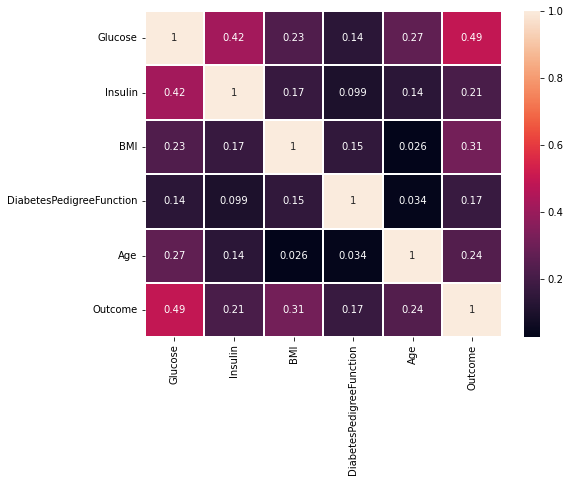

In [61]:
# Checking correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(ndta.corr(),annot=True,linewidths=2)
plt.show()

In [62]:
# Storing the new data without pregnancies to train and test
X=ndta.drop('Outcome',axis=1)
y=ndta['Outcome']

In [63]:
#SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [64]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),('lr_classifier',LogisticRegression())])

pipelline_knn=Pipeline([('scalar2',StandardScaler()),('knn_classifier',KNeighborsClassifier())])

pipeline_svc=Pipeline([('scalar3',StandardScaler()),('svc_classifier',SVC())])

pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_gbc=Pipeline([('gbc_classifier',GradientBoostingClassifier())])

In [65]:
pipelines=[pipeline_lr,pipelline_knn,pipeline_svc,pipeline_dt,pipeline_rf,pipeline_gbc]

In [66]:
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('scalar3', StandardScaler()), ('svc_classifier', SVC())]),
 Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier())]),
 Pipeline(steps=[('gbc_classifier', GradientBoostingClassifier())])]

In [67]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [68]:
pipe_dict={0:'LR',
          1:'KNN',
          2:'SVC',
          3:'DT',
          4:'RF',
          5:'GBC'}

In [69]:
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [70]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_train,y_train)*100))

LR Test Accuracy:77.68729641693811
KNN Test Accuracy:82.24755700325733
SVC Test Accuracy:83.38762214983714
DT Test Accuracy:100.0
RF Test Accuracy:100.0
GBC Test Accuracy:91.69381107491856


In [71]:
X=ndta.drop('Outcome',axis=1)
y=ndta['Outcome']

In [72]:
rf=RandomForestClassifier(n_estimators=500,random_state=1,oob_score=True)

In [73]:
rf.fit(X,y)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=1)

# PREDICTING THE SAME DATAS WITHOUT NO. OF PREGNANCIES

In [74]:
new_data1=pd.DataFrame({
    'Glucose':155.0,
    'Insulin':123,
    'BMI':33,
    'DiabetesPedigreeFunction':0.627,
    'Age':55,
},index=[0])

In [75]:
p=rf.predict(new_data1)

In [76]:
if p[0] == 0:
    print('non-diabetic')
else:
    print('Diabetic')

Diabetic


In [77]:
nd1=pd.DataFrame({
    'Glucose':500.0,
    'Insulin':120,
    'BMI':55,
    'DiabetesPedigreeFunction':0.827,
    'Age':52,
},index=[0])

In [78]:
p=rf.predict(nd1)
p

array([1], dtype=int64)

In [79]:
nd2=pd.DataFrame({
    'Glucose':110.0,
    'Insulin':80,
    'BMI':33,
    'DiabetesPedigreeFunction':0.127,
    'Age':22,
},index=[0])


In [80]:
p=rf.predict(nd2)
p

array([0], dtype=int64)

In [81]:
nd3=pd.DataFrame({
    'Glucose':90.0,
    'Insulin':100,
    'BMI':29,
    'DiabetesPedigreeFunction':0.397,
    'Age':43,
},index=[0])
p=rf.predict(nd3)
p

array([0], dtype=int64)